In [11]:
import tensorflow as tf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [12]:
base_dir='/home/mehdi/Pictures/fa/classic/train'

In [13]:
image_size=224
batch_size=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2
    ,zoom_range=0.2,
    horizontal_flip=True,validation_split=0.1
)

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
validation_split=0.1
)

In [14]:
train_datagen=train_datagen.flow_from_directory(base_dir,classes=['cabinet','car','chair','dresser','lampshade','rug','sofa','table'],target_size=(image_size,image_size),subset='training',batch_size=batch_size)
test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(image_size,image_size),classes=['cabinet','car','chair','dresser','lampshade','rug','sofa','table'],subset='validation',batch_size=batch_size)


Found 2206 images belonging to 8 classes.
Found 241 images belonging to 8 classes.


In [21]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, padding='same',strides=2,kernel_size=3, activation='relu',input_shape=(224, 224, 3)))

model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(filters=64, padding='same',strides=2,kernel_size=3, activation='relu',input_shape=(224, 224, 3)))

model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(8, activation='softmax'))

In [22]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_datagen,epochs=30,validation_data=test_datagen)

Epoch 1/30
35/35 [==============================] - 140s 4s/step - loss: 2.0059 - accuracy: 0.2004 - val_loss: 1.8347 - val_accuracy: 0.3232
Epoch 2/30
35/35 [==============================] - 112s 3s/step - loss: 1.7844 - accuracy: 0.3459 - val_loss: 1.6625 - val_accuracy: 0.4057
Epoch 3/30
35/35 [==============================] - 149s 4s/step - loss: 1.6370 - accuracy: 0.4053 - val_loss: 1.5407 - val_accuracy: 0.4628
Epoch 4/30
35/35 [==============================] - 129s 4s/step - loss: 1.5152 - accuracy: 0.4773 - val_loss: 1.4595 - val_accuracy: 0.4701
Epoch 5/30
35/35 [==============================] - 118s 3s/step - loss: 1.4242 - accuracy: 0.5059 - val_loss: 1.3206 - val_accuracy: 0.5694
Epoch 6/30
35/35 [==============================] - 111s 3s/step - loss: 1.3253 - accuracy: 0.5512 - val_loss: 1.2823 - val_accuracy: 0.5617
Epoch 7/30
35/35 [==============================] - 87s 3s/step - loss: 1.2740 - accuracy: 0.5671 - val_loss: 1.2807 - val_accuracy: 0.5549
Epoch 8/30
35/

In [25]:
model.save('classic_model.h5')

In [ ]:
# del model  

# model = tf.keras.models.load_model('classic_model.h5')


In [ ]:
# model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 7)                 8

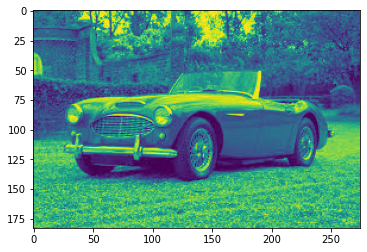

In [26]:
import matplotlib.pyplot as pl
import cv2 as cv
img_path = "/home/mehdi/Pictures/fa/classic/test/232.jpg"

img = cv.imread(img_path,cv.IMREAD_GRAYSCALE)
pl.imshow(img)
pl.show()


In [27]:
img=tf.keras.utils.load_img(img_path)
img=tf.keras.utils.img_to_array(img)
print(img.shape) # (272, 185)
# Resize the image
img=tf.image.resize(img,(224,224))
print(img.shape)# (224,224,3)

(183, 275, 3)
(224, 224, 3)


In [28]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
def load_image(img_path, show=False):

    img = tf.keras.preprocessing.image.load_img(img_path, 
                                                target_size=(224, 224))
    img_tensor = tf.keras.preprocessing.image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('on')
        plt.show()

    return img_tensor

In [39]:
import csv  
import random
import math

classes=['cabinet','car','chair','dresser','lampshade','rug','sofa','table']

header = ['id' , 'price','class']

 
labels=[]
for i in range(1,588):
    
    img_path = "/home/mehdi/Pictures/fa/classic/test/"+str(i)+".jpg"
    new_image = load_image(img_path,show=False)
    preds = model.predict(new_image)
    MaxPosition=np.argmax(preds) 
    label = classes[MaxPosition]
    labels.append(label)
    


  
    

with open('test_classic.csv', 'w', encoding='UTF8') as f:
    
    writer = csv.writer(f)
    
    # write the header
    writer.writerow(header)

    # write the data
    for i in range(0,588):
        data = [i+1,math.floor(random.randint(100000, 20000000)),labels[i]]
        writer.writerow(data)




1/1 [==============================] - 0s 27ms/step


IndexError: list index out of range

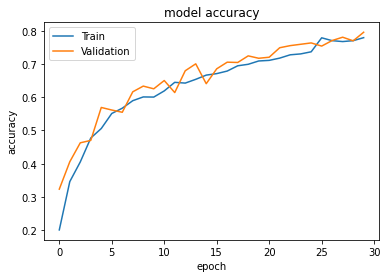

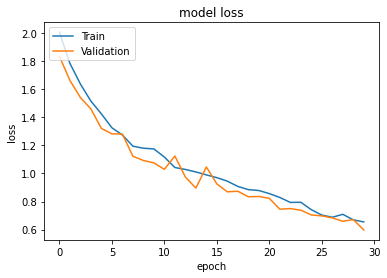

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()